## Explanation of the problem with the JETTO/PION simulation for the alpha heating (JET plasma experiment 99965)

#### In the experiment with D minority, after analysing the ion and electron temperatures, it has been reported a phase delay between Ti and Te of 40º at the plasma centre (see Figure 1). This is relevant as it means there is a heating mechanism raising electron temperature which is quite delayed with respect to the others. It is believed that the only mechanism which is producing such an effect is alpha heating.

#### The main workload of this paper is devoted to the analysis of 99965 within TRANSP/TORIC and JETTO/PION. We try to validate this experimentally observed phase delay and clarify whether the only mechanism capable for such a delay are alphas, if true, this would be a clear demonstration of alpha heating in a JET plasma. In principle, the mechanisms capable of electron heating in this particular discharge are direct electron heating (Landau damping and TTMP which should not be much delayed) and ion-electron collisions from resonant and NBI ions (in our case it is D minority but also full D NBI in a T rich plasma) and fusion-born alphas, which both are delayed. We need to clarify how much these two mechanisms are delayed, hopefully getting a more delayed alpha-electron heating signal rather than D(ICRH + NBI)-electron heating. This is, in essence, what this transport team led by Paola Mantica are trying to do/understand. However, for some reason in the JETTO/PION simulation of 99965, Ti is delayed with respect to Te, exactly the opposite to what experimentally is seen and to what TRANSP/TORIC predicts. Furthermore, the phase computed with FFT of this JETTO/PION simulation for D (ICRH + NBI) ion-electron heating goes negative quickly in rho which means that the signal is not delayed with respect to the ICRH one but quite the opposite (see Figure 2, blue signal). 

#### I think it is difficult to disentangle why this is happening as the background plasma is changing (not fixed) but with this example I hope to make it clearer and we shall show that the data you provided to me shows that the ion-electron collisional heating is delayed against the ICRH signal.

<figure>
    <img src="./phase_exp_99965.png"
         alt="99965"
         width="800"
         height="600"
         style="display: block; margin: 0 auto">
    <figcaption align="center"><strong>Figure 1.</strong> Phasing of Ti and Te from 99965.</figcaption>
</figure>

<figure>
    <img src="./PION_phase.png"
         alt="99965"
         width="800"
         height="600"
         style="display: block; margin: 0 auto">
    <figcaption align="center"><strong>Figure 2.</strong> Phases computed for the JETTO/PION simulation for 99965.</figcaption>
</figure>


##### In order to proceed I will make a first very simple example just to illustrate what I expect to occur with the PION data. For this I will build three sinusoidal signals wchich I will delay with a phase with respect to the reference one (we can think of the reference one as the ICRH signal of 1Hz). 

In [232]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

In [233]:
#create three signals, a reference one and two delayed ones, 1 radian and 2 radians respectivley. 
dt = 0.01 #delta time
x = np.arange(0, 1.,dt) # simulating one full second in dt intervals
signal_one = 0.5*np.sin(2*np.pi*x*5 + 0)   # Reference 5Hz
signal_two = 0.5*np.sin(2*np.pi*x*5 - 0.5)   # Delayed 0.5 radian
signal_three = 0.5*np.sin(2*np.pi*x*5 - 1.5) # Delayed 1.5 radians


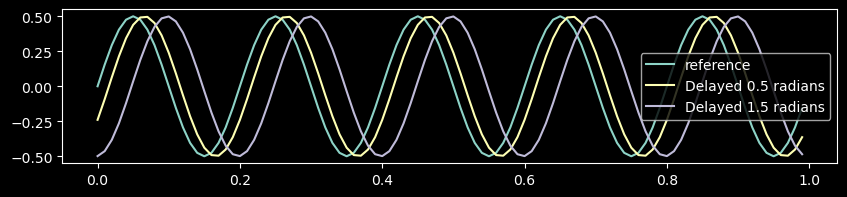

In [234]:
fig = plt.figure(figsize=(10,2))
plt.plot(x,signal_one, label="reference")
plt.plot(x,signal_two, label='Delayed 0.5 radians')
plt.plot(x,signal_three, label='Delayed 1.5 radians')
plt.legend()

##### Now if I make the FFT of these signals and retrieve the 5Hz component... One has to be careful when using the FFT method as to have the exact frequency you are interested in in the frequency domain discretization, in this case the 5Hz

In [235]:
signal_one_fft = np.fft.fft(signal_one)
signal_two_fft = np.fft.fft(signal_two)
signal_three_fft = np.fft.fft(signal_three)
freq = np.fft.fftfreq(len(signal_one), d=dt) #Frequency grid in the frequency domain
print(freq) #prints the frequency domain discretization

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]


Text(0, 0.5, 'Magnitude (a.u.)')

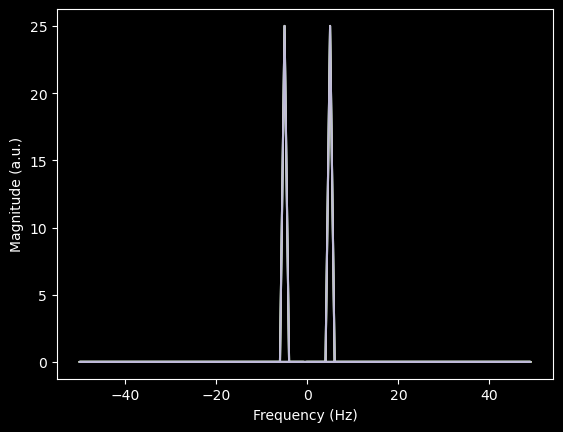

In [236]:
# Plot of the magnitude for each frequency component of the three signals (they obviously overlap as they are pure sinusoidal signals with a phase offset) 
plt.plot(freq,np.abs(signal_one_fft))
plt.plot(freq,np.abs(signal_two_fft))
plt.plot(freq,np.abs(signal_three_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (a.u.)')

In [237]:
freq_index_5Hz = np.where(freq == 5.)
phase_signal_one = np.angle(signal_one_fft[freq_index_5Hz])
phase_signal_two = np.angle(signal_two_fft[freq_index_5Hz])
phase_signal_three = np.angle(signal_three_fft[freq_index_5Hz])
phases = [phase_signal_one,phase_signal_two,phase_signal_three]
phase_delay_reference = phases - phase_signal_one

##### Now we can show the phase difference between the signals for the main fourier component at 5Hz. This was a very simple example with a pure sinusoidal signal. We shall try with your data next.

In [238]:
for i,value in enumerate(phase_delay_reference):
    print(f"Phase {i}: {value}")

Phase 0: [0.]
Phase 1: [-0.5]
Phase 2: [-1.5]


#### PION data provided by Lars-Göran

In [239]:
#Read the data
file = np.genfromtxt('Pcoll_2.txt')
file[0:10]

array([[0.  , 0.  , 0.  , 2.69],
       [0.1 , 2.13, 0.51, 2.78],
       [0.15, 2.15, 0.56, 2.82],
       [0.2 , 2.16, 0.6 , 2.85],
       [0.25, 2.16, 0.63, 2.88],
       [0.3 , 2.17, 0.67, 2.9 ],
       [0.35, 2.16, 0.7 , 2.92],
       [0.4 , 2.15, 0.73, 2.95],
       [0.45, 2.15, 0.76, 2.97],
       [0.5 , 0.5 , 0.29, 0.3 ]])

In [240]:
#Assign each column to each variable
time = file[:,0]
pci = file[:,1]
pce = file[:,2]
pabs = file[:,3]

Text(0.5, 0, 'Time (s)')

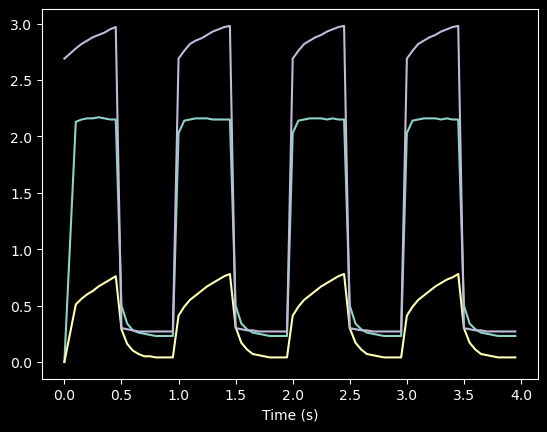

In [241]:
#Plot the data computed by PION
plt.plot(time,pci)
plt.plot(time,pce)
plt.plot(time,pabs)
plt.xlabel('Time (s)')

In [242]:
#Select a 2s time window to get the 1Hz frequency in the frequency grid (the window is arbitrary)
#I apply an arbitrary subtraction on each signal to minimize the component a 0Hz (the signals are always positive), this, 
#however, does not have any impact on the computed phase.
time = time[18:40+18].copy()
pabs = pabs[18:40+18].copy() -1.5
pce = pce[18:40+18].copy() - 0.5
pci = pci[18:40+18].copy() - 1.

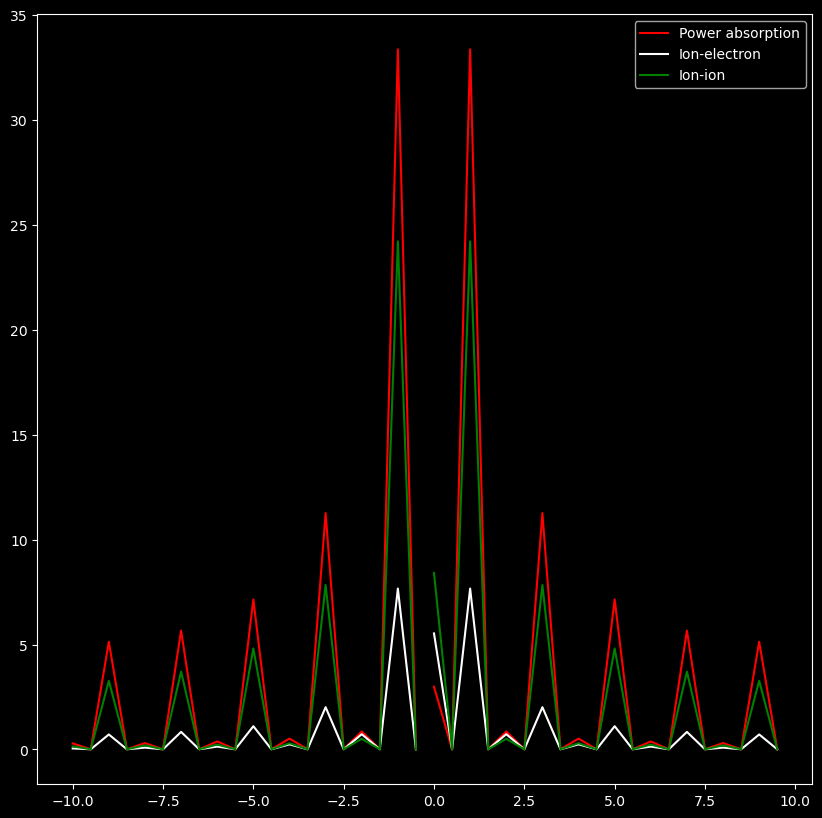

In [243]:
#FFT of signals
fig = plt.figure(figsize=(10,10))
pabs_fft = np.fft.fft(pabs)
pce_fft = np.fft.fft(pce)
pci_fft = np.fft.fft(pci)
freq = np.fft.fftfreq(len(pabs), d=0.05)
plt.plot(freq[0:20],np.abs(pabs_fft)[0:20],'r', label='Power absorption')
plt.plot(freq[20:],np.abs(pabs_fft)[20:],'r')
plt.plot(freq[0:20],np.abs(pce_fft)[0:20],'w', label='Ion-electron')
plt.plot(freq[20:],np.abs(pce_fft)[20:],'w')
plt.plot(freq[0:20],np.abs(pci_fft)[0:20],'g', label='Ion-ion')
plt.plot(freq[20:],np.abs(pci_fft)[20:],'g')
plt.legend()

In [244]:
#Frequency domain
print(freq)

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5 -10.   -9.5  -9.   -8.5
  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5
  -2.   -1.5  -1.   -0.5]


In [245]:
#Now I compute the phase shift with regards to the reference which is Power absorption
phase_pabs = np.angle(pabs_fft)
phase_pce = np.angle(pce_fft)
phase_pci = np.angle(pci_fft)
phase_index_1Hz = np.where(freq == 1.)
print('reference: ', phase_pabs[phase_index_1Hz] - phase_pabs[phase_index_1Hz], '\n',
      'pce shift: ', phase_pce[phase_index_1Hz] - phase_pabs[phase_index_1Hz], '\n',
      'pci shift: ', phase_pci[phase_index_1Hz] - phase_pabs[phase_index_1Hz])

reference:  [0.] 
 pce shift:  [-0.28725805] 
 pci shift:  [-0.00548568]


##### The previous result shows that pce is the most delayed signal with a phase of -0.91 radians with regards to the reference, while pci looks quite close to the reference with only ~-0.02. We can plot now these signals to see how they compare...

In [246]:
#Approximated signals (we don't care about the magnitude)
pabs_approx = np.cos(2*np.pi*1.*time+phase_pabs[phase_index_1Hz])
pce_approx = np.cos(2*np.pi*1.*time+phase_pce[phase_index_1Hz])
pci_approx = np.cos(2*np.pi*1.*time+phase_pci[phase_index_1Hz])

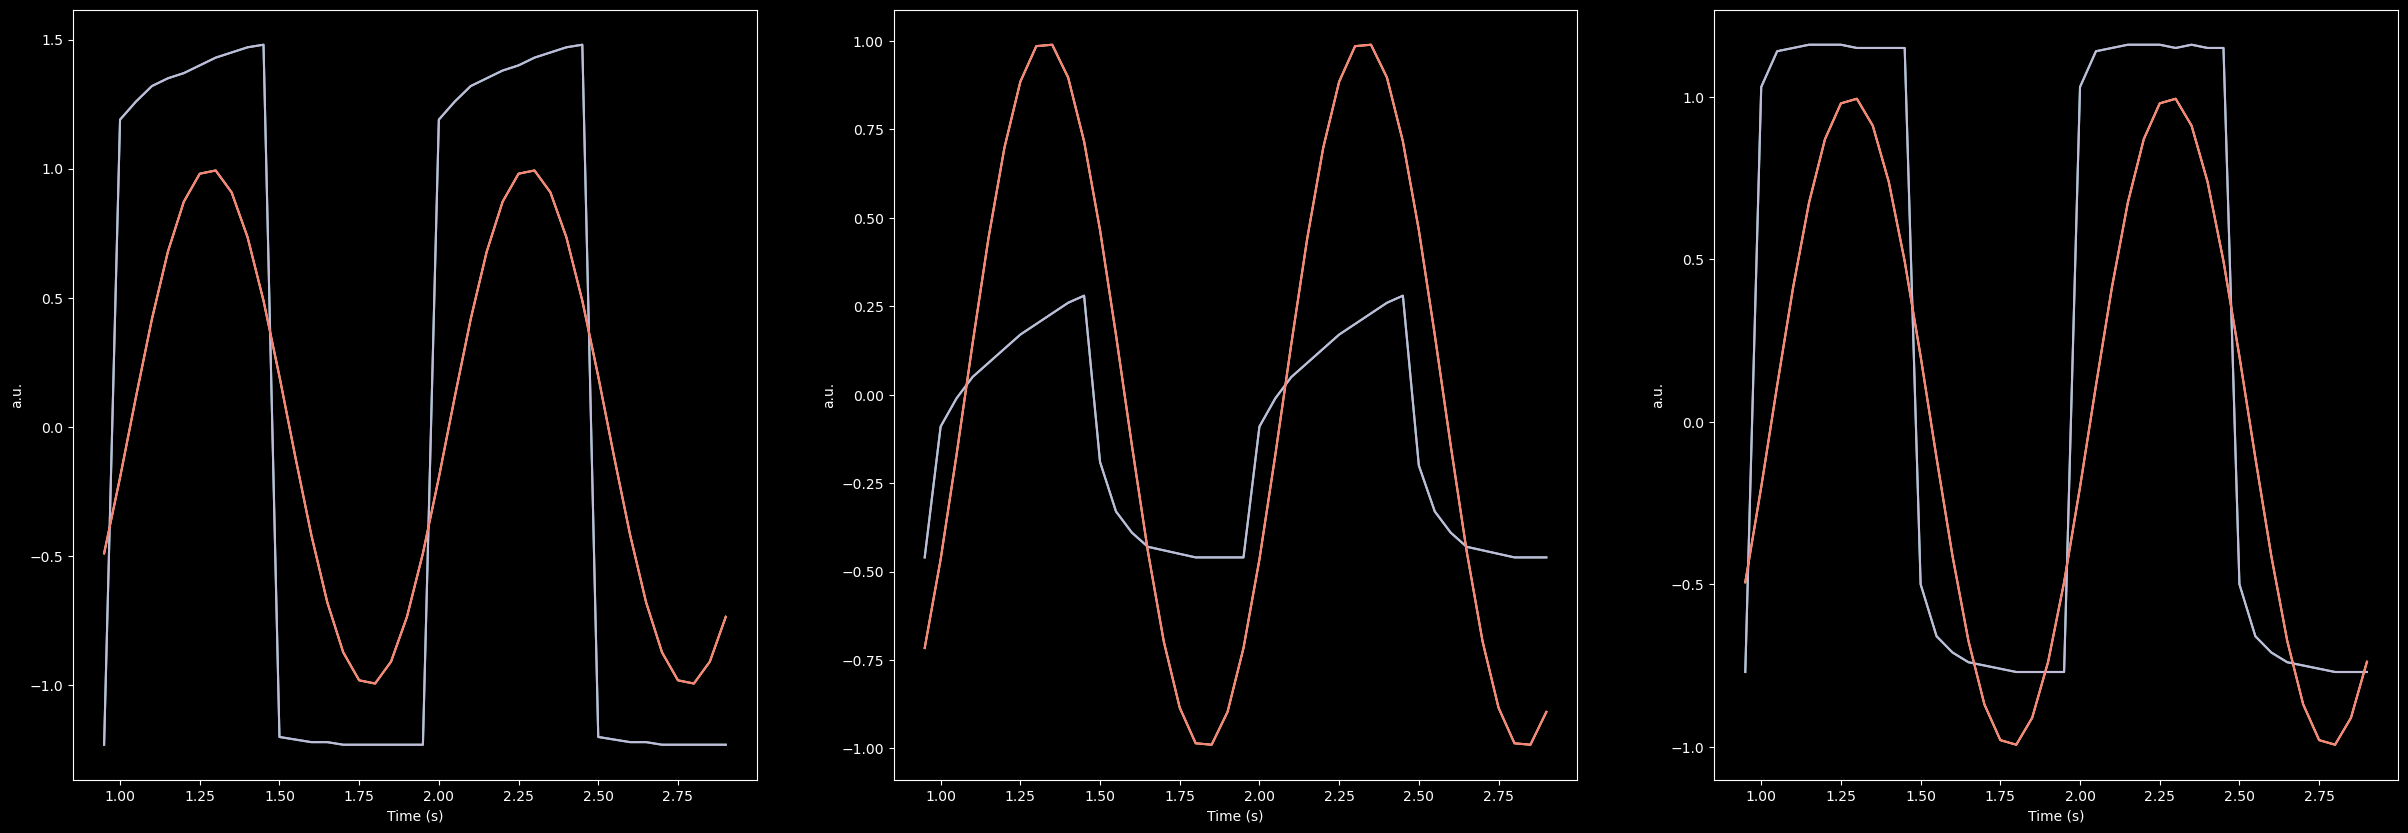

In [247]:
rows = 1
cols = 3
variables = [pabs,pce,pci]
variables_approximated = [pabs_approx,pce_approx,pci_approx]
fig,axs = plt.subplots(nrows=rows, ncols=cols, figsize=(30,10))
for col in range(cols):
    axs[col].plot(time,variables[col])
    axs[col].plot(time,variables_approximated[col])
    axs[col].set_xlabel('Time (s)')
    axs[col].set_ylabel('a.u.')
axs[0].plot(time,pabs)
axs[0].plot(time,pabs_approx)
axs[1].plot(time,pce)
axs[1].plot(time,pce_approx)
axs[2].plot(time,pci)
axs[2].plot(time,pci_approx)

##### Now if we plot the sinusoidal signals we will see what we expected, the ion-electron signal to be delayed with regards to the other two. By the way, I also plotted your first simulation with lower density, the phase delay is even stronger which I believe ions might have larger energies and slowing down time due to lower plasma density.

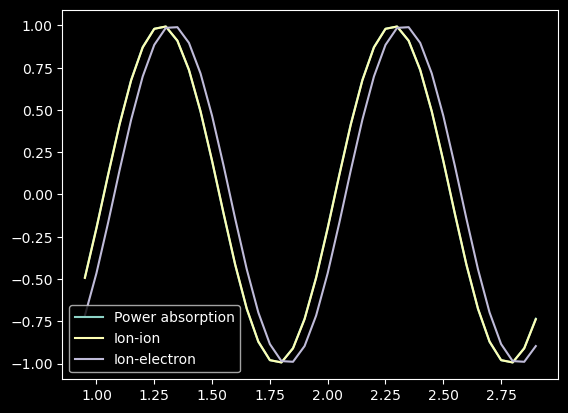

In [248]:
#Pabs and PCI are quite close in phase and they basically overlap in the plot, while PCE is clearly delayed
plt.plot(time,pabs_approx, label='Power absorption')
plt.plot(time,pci_approx, label='Ion-ion')
plt.plot(time,pce_approx, label='Ion-electron')
plt.legend()

##### So the question is, why in Figure 2 (in this notebook) the PCE has a phase which is lower than PCI and why it goes negative. Bear in mind that in the work, they are fitting the curve to *Asin(wt - phi)*, therefore a negative phi translate in *Asin(wt + |phi|)*, i.e., not a delay but advancing the signal.
##### Could it be the NBI? In my opinion although the NBI is resonant I do not see why it should avoid delaying the signal. I should probably try with a standalone simulation using NBI... 